<a href="https://colab.research.google.com/github/Rmkh77/Credit-risk-prediction/blob/main/credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # used for mathametical calculations
import pandas as pd # used to read data set
import matplotlib.pyplot as plt # used in plotting graphs
import seaborn as sns # used to draw heat map

In [ ]:
credit=pd.read_csv("/content/drive/MyDrive/project_hbic/credit_risk/credit_customers.csv")
# reading data set

In [ ]:
credit.info()
# getting complete information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
credit.isnull().sum()
# countting null values in each and every column

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

<Axes: xlabel='credit_history', ylabel='Count'>

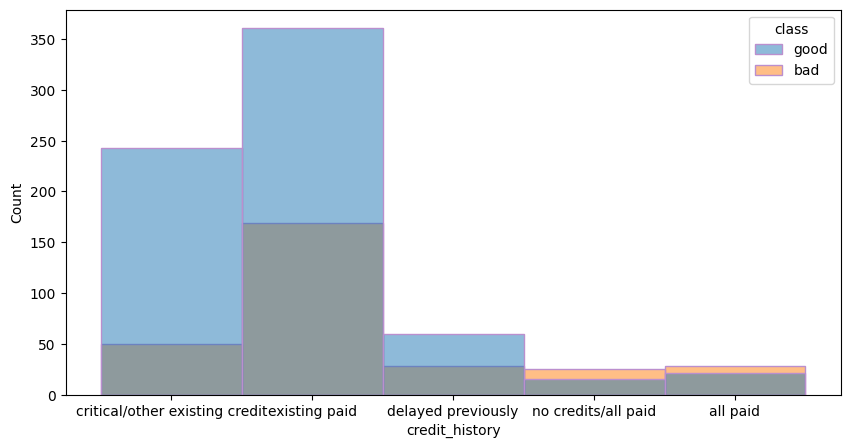

In [ ]:
# plotting histogram for credit history column
plt.figure(figsize=(10,5))
sns.histplot(credit, x='credit_history',color='green', edgecolor='#BB8FCE', hue='class')

observation: from the above plot, it can observed that number of good and bad credit present in credit history column

In [ ]:
credit.nunique()
# getting unique value count in every column

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

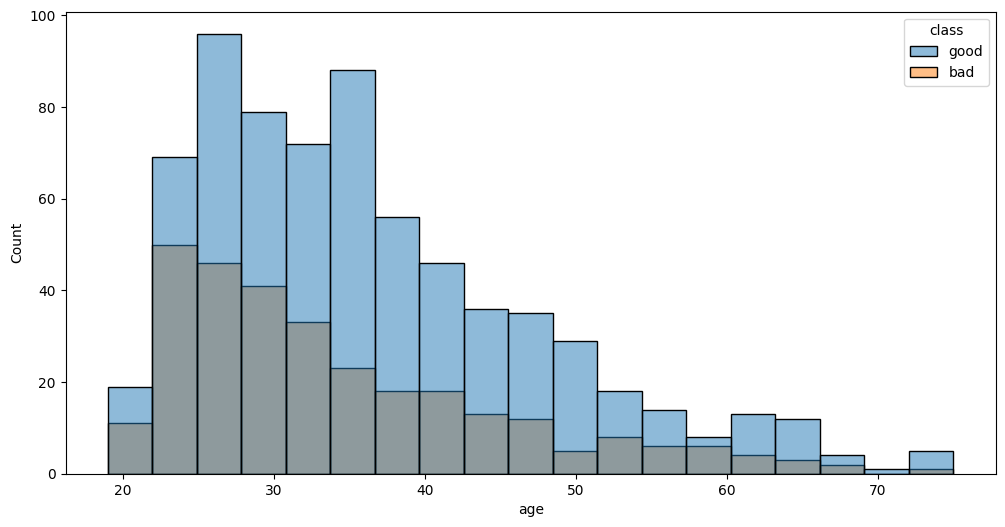

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(credit, x='age', hue='class')
# plotting histogram for age column

observation: from the above plot, it can observed that number of good and bad credit present in certain range of age group

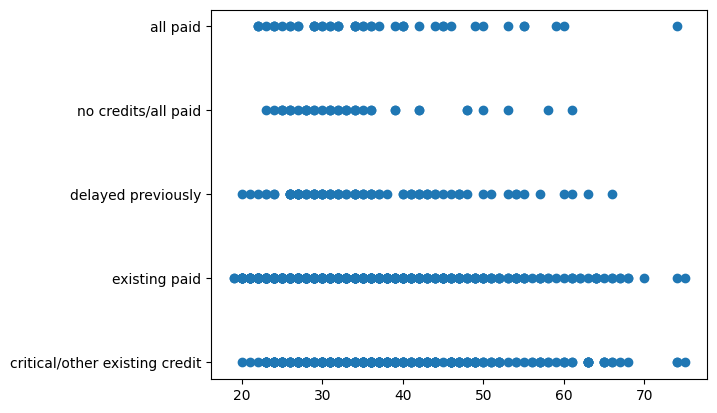

In [ ]:
plt.scatter(credit.age,credit.credit_history)
# plotting scatter plot for age and credit history columns

The above scatter plot shows how the credit history data is scttered with respective to age group

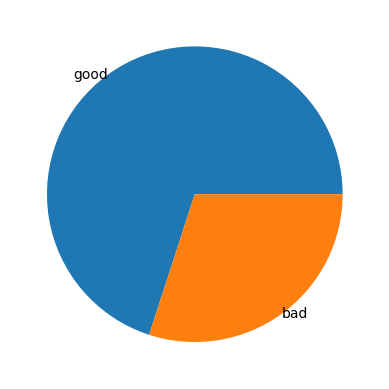

In [ ]:
lst1=credit['class'].value_counts() # getting values count in class column
tisland=credit['class'].unique() # getting unique names in class column
plt.pie(lst1,labels=tisland,labeldistance=1) # plotting pie chart for class column
plt.show() # display

obsevation: number of good and bad credit risk are shown in the above plot

In [ ]:
num_types=credit.select_dtypes(include=['int64','float64'])
# grouping all numerical columns into num_types

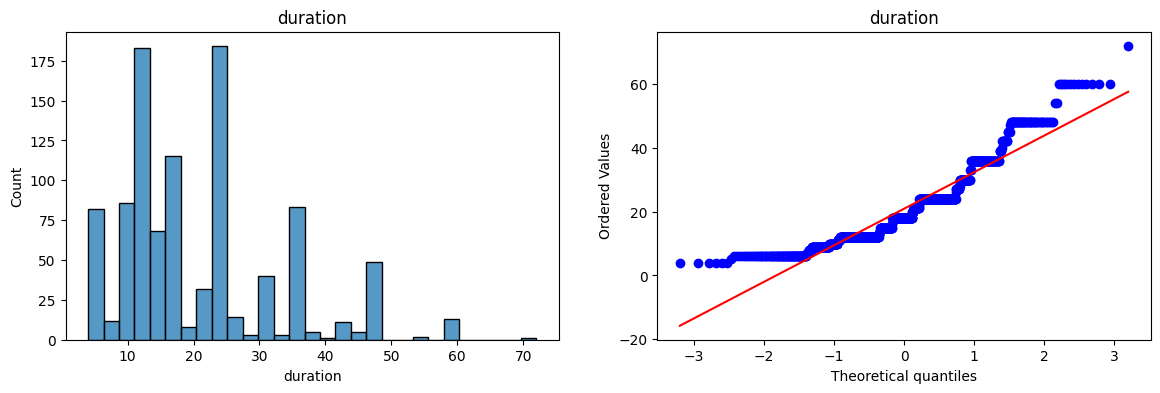

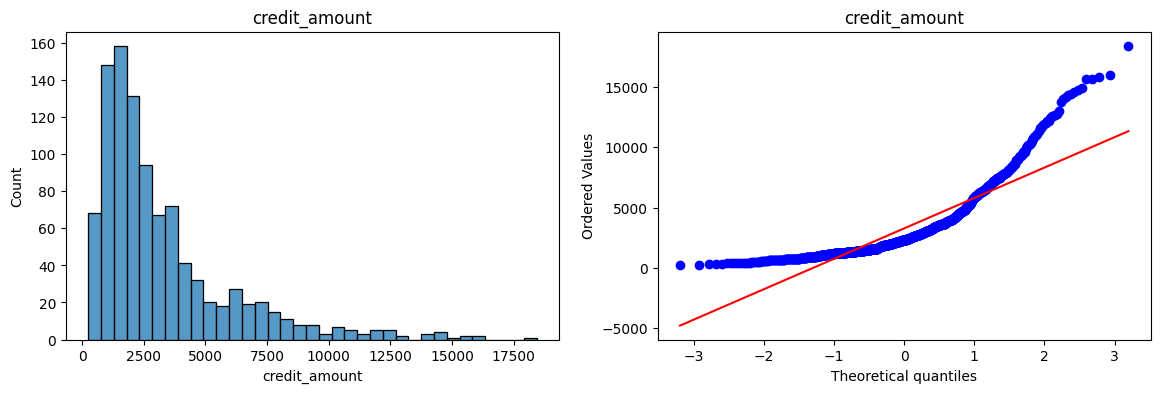

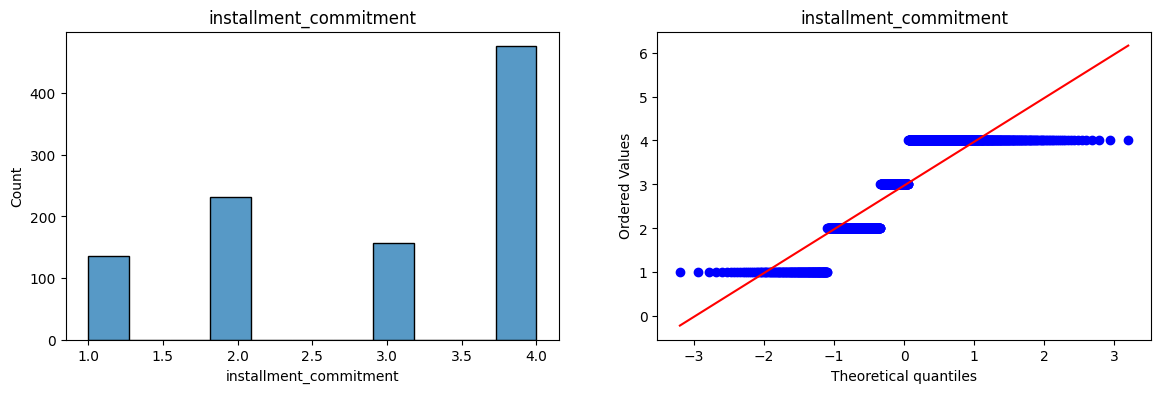

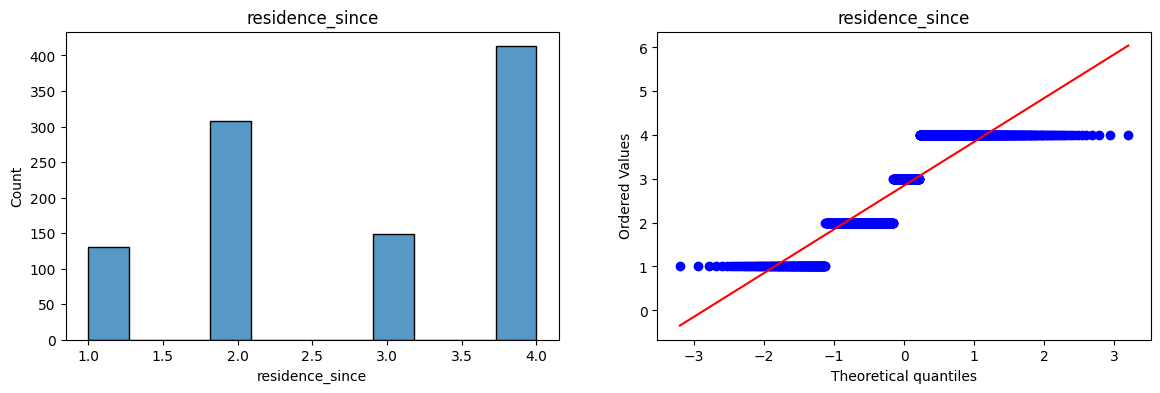

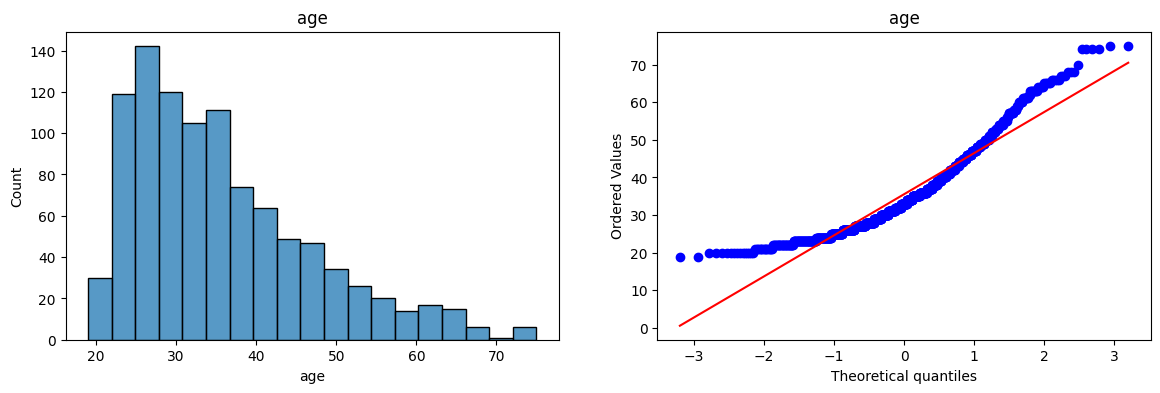

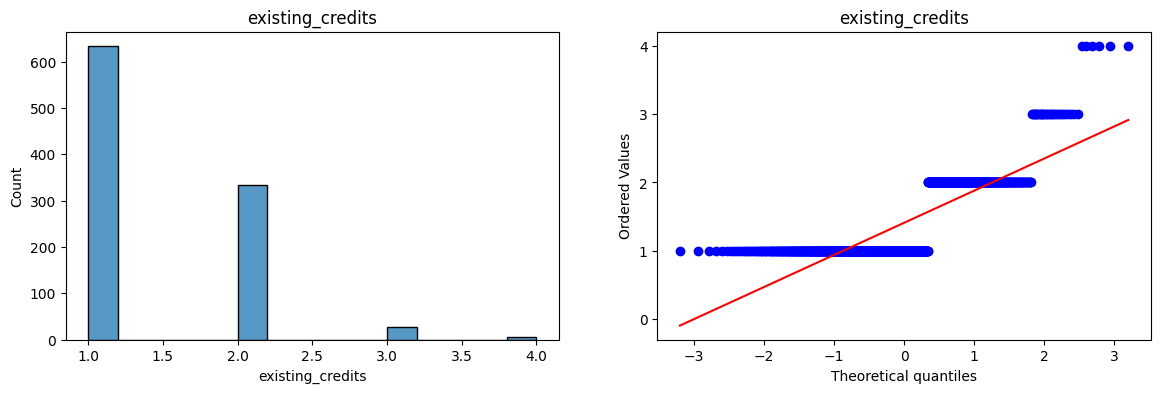

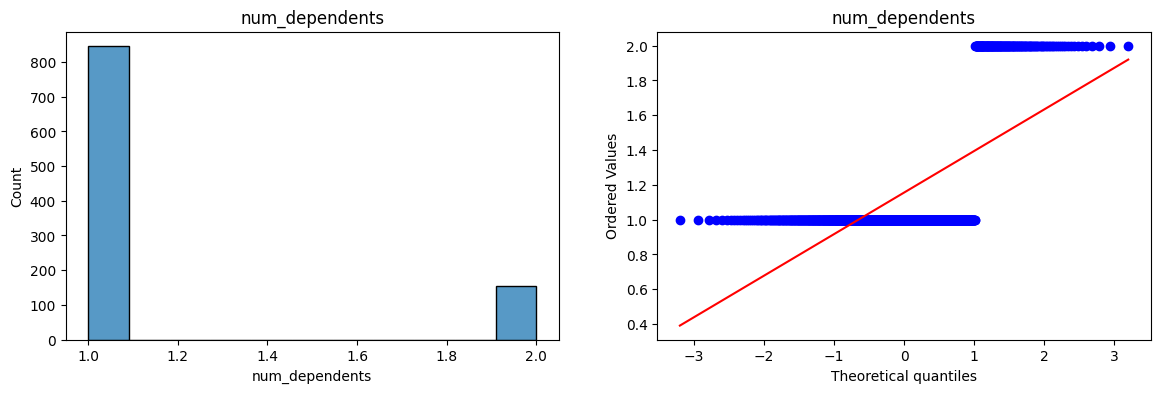

In [ ]:
from scipy import stats # importing scipy for probability graph
for col in num_types.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    # histogran for numerical columns
    sns.histplot(num_types[col])
    plt.title(col)
    # probabilty graph for numerical column
    plt.subplot(122)
    stats.probplot(num_types[col],plot = plt)
    plt.title(col)

    # dispaly
    plt.show()


observation: above graphs shows number of good and credit risk present in each attribute on the left, and on right it shows the how it is varing from normal distribution

boxplot for :duration


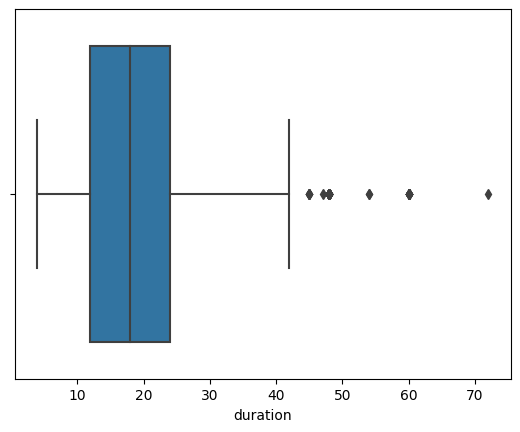

boxplot for :credit_amount


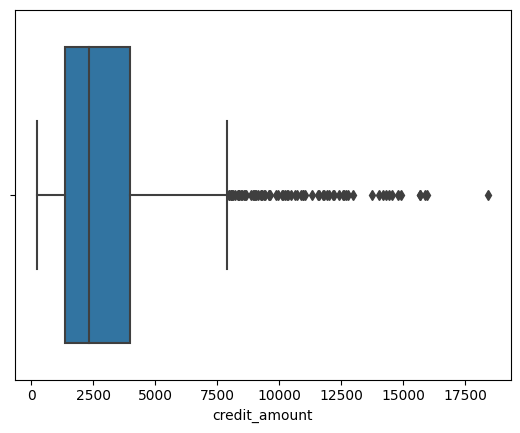

boxplot for :installment_commitment


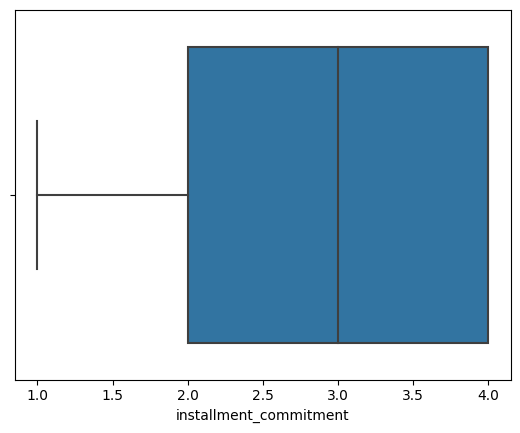

boxplot for :residence_since


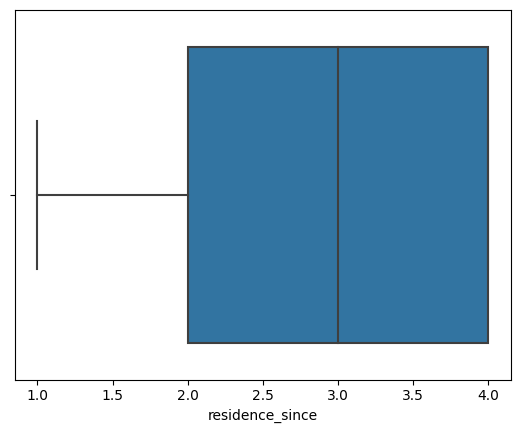

boxplot for :age


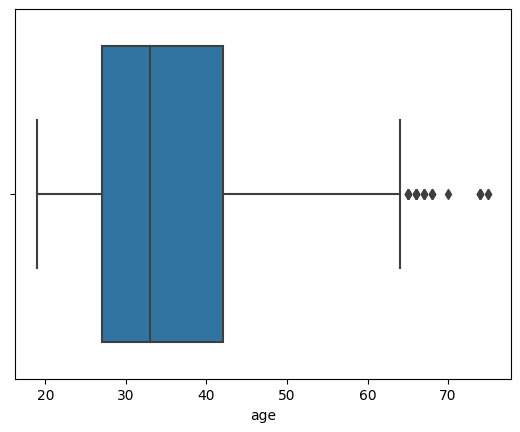

boxplot for :existing_credits


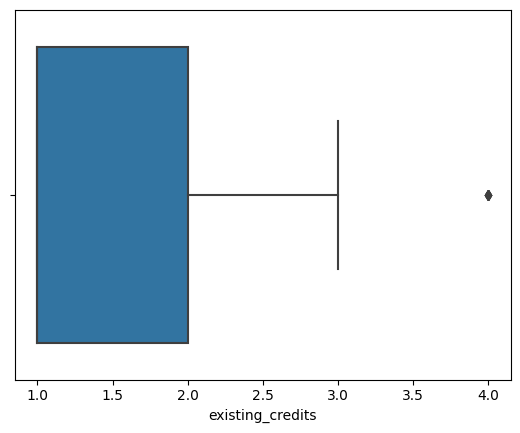

boxplot for :num_dependents


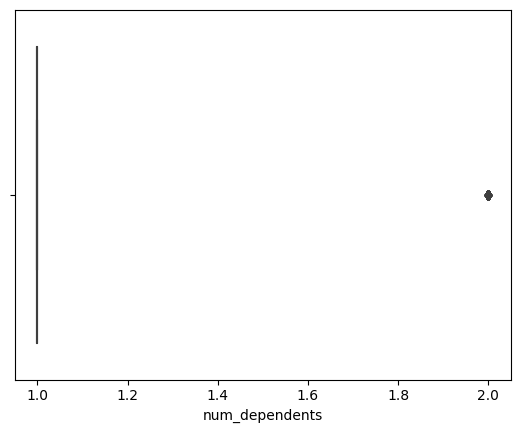

In [ ]:
# plotting box plots for numerical columns to know about outliers
for i in num_types:
  sns.boxplot(x=num_types[i])
  print("boxplot for :"+i)
  plt.show()

obsevation: this plot shows count of outliers that exist in each numerical column. In credit amount, existing credits and duration columns have outliers

In [ ]:
# checking for outlier columns and printing them
for i in num_types:
    Q1=num_types[i].quantile(0.25)
    Q3=num_types[i].quantile(0.75)
    IQR=Q3 - Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR

    if (num_types[(num_types[i]>upper_bound)]).any(axis=None):
        print(i,":-Outlier Exist")
    elif (num_types[(num_types[i]<lower_bound)]).any(axis=None):
        print(i,":-Outlier Exist")

duration :-Outlier Exist
credit_amount :-Outlier Exist
age :-Outlier Exist
existing_credits :-Outlier Exist
num_dependents :-Outlier Exist


conformation of outlier presences


In [ ]:
# removing rows from duration columns that are outliers
Q1=num_types["duration"].quantile(0.25)
Q3=num_types["duration"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new=[]
for i in num_types["duration"]:
    if  (i>upper_bound):
           new.append(upper_bound)
    elif (i<lower_bound):
        new.append(lower_bound)
    else:
         new.append(i)

num_types["duration"]=new

In [ ]:
# removing rows from credit amount columns that are outliers
Q1=num_types["credit_amount"].quantile(0.25)
Q3=num_types["credit_amount"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new=[]
for i in num_types["credit_amount"]:
    if  (i>upper_bound):
           new.append(upper_bound)
    elif (i<lower_bound):
        new.append(lower_bound)
    else:
         new.append(i)

num_types["credit_amount"]=new

In [ ]:
# removing rows from existing credits columns that are outliers
Q1=num_types["existing_credits"].quantile(0.25)
Q3=num_types["existing_credits"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new=[]
for i in num_types["existing_credits"]:
    if  (i>upper_bound):
           new.append(upper_bound)
    elif (i<lower_bound):
        new.append(lower_bound)
    else:
         new.append(i)

num_types["existing_credits"]=new

In [ ]:
# removing rows from age columns that are outliers
Q1=num_types["age"].quantile(0.25)
Q3=num_types["age"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new=[]
for i in num_types["age"]:
    if  (i>upper_bound):
           new.append(upper_bound)
    elif (i<lower_bound):
        new.append(lower_bound)
    else:
         new.append(i)

num_types["age"]=new

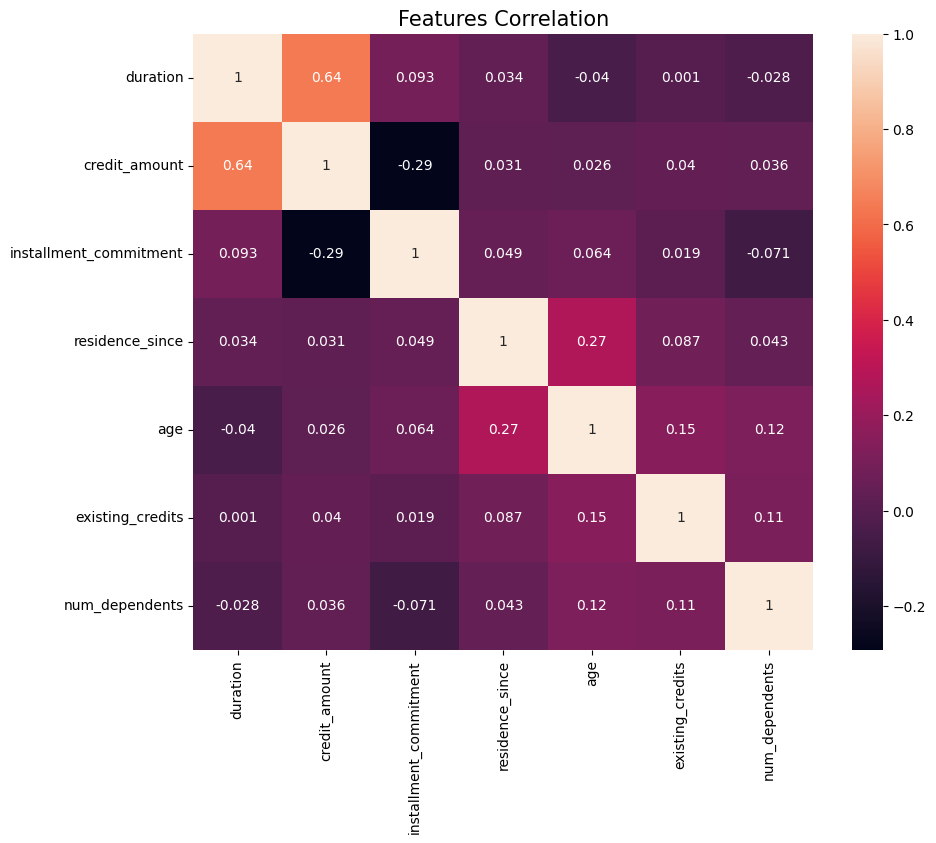

In [ ]:
# plotting heat map for all numerical columns to find corelation
plt.figure(figsize=(10,8))
corr = num_types.corr()
sns.heatmap(corr, annot=True)
plt.title("Features Correlation", fontsize = 15)
plt.show()

obsevation: this shows the co-relation that exist between columns if so the need to checked
from the above plot,it is clear that installment commitment is depending on credit amount hence it is dropped

In [ ]:
# storing few columns that are not necessary for standardization
temp=num_types['installment_commitment']
temp1=num_types['existing_credits']
temp2=num_types['residence_since']
temp3=num_types['num_dependents']

# dropping them
num_types.drop(columns=['installment_commitment','residence_since','existing_credits','num_dependents'],inplace=True)
num_types

,duration,credit_amount,age
0,6.0,1169.0,64.5
1,42.0,5951.0,22.0
2,12.0,2096.0,49.0
3,42.0,7882.0,45.0
4,24.0,4870.0,53.0
...,...,...,...
995,12.0,1736.0,31.0
996,30.0,3857.0,40.0
997,12.0,804.0,38.0
998,42.0,1845.0,23.0


In [ ]:
# importing standard scaler module for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_type= pd.DataFrame(scaler.fit_transform(num_types),
                                    columns = num_types.columns,
                                    index = num_types.index)
num_type
# stnadardization is important because the numerical values range is so high
#which leads to complexity hence it should standard to certain range

,duration,credit_amount,age
0,-1.348465,-0.860961,2.616620
1,2.044611,1.326550,-1.211943
2,-0.782952,-0.436908,1.220321
3,2.044611,2.209879,0.859985
4,0.348073,0.832050,1.580656
...,...,...,...
995,-0.782952,-0.601589,-0.401188
996,0.913586,0.368656,0.409566
997,-0.782952,-1.027929,0.229399
998,2.044611,-0.551727,-1.121859


In [ ]:
# converting target column into numerical type
credit['class'].replace({'good':1,'bad':0},inplace=True)
cat_types=credit.select_dtypes(include='object')
# grouping all catagorical columns into cat_types
cat_types

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,existing paid,furniture/equipment,<100,4<=X<7,female div/dep/mar,none,real estate,none,own,unskilled resident,none,yes
996,<0,existing paid,used car,<100,1<=X<4,male div/sep,none,life insurance,none,own,high qualif/self emp/mgmt,yes,yes
997,no checking,existing paid,radio/tv,<100,>=7,male single,none,car,none,own,skilled,none,yes
998,<0,existing paid,radio/tv,<100,1<=X<4,male single,none,no known property,none,for free,skilled,yes,yes


In [ ]:
num_typess=pd.concat([num_type,temp,temp1,temp2,temp3],axis=1)
# concate numerical columns into num_typess

In [ ]:
num_typess

,duration,credit_amount,age,installment_commitment,existing_credits,residence_since,num_dependents
0,-1.348465,-0.860961,2.616620,4.0,2.0,4.0,1.0
1,2.044611,1.326550,-1.211943,2.0,1.0,2.0,1.0
2,-0.782952,-0.436908,1.220321,2.0,1.0,3.0,2.0
3,2.044611,2.209879,0.859985,2.0,1.0,4.0,2.0
4,0.348073,0.832050,1.580656,3.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...
995,-0.782952,-0.601589,-0.401188,3.0,1.0,4.0,1.0
996,0.913586,0.368656,0.409566,4.0,1.0,4.0,1.0
997,-0.782952,-1.027929,0.229399,4.0,1.0,4.0,1.0
998,2.044611,-0.551727,-1.121859,4.0,1.0,4.0,1.0


In [ ]:
# storing target column in temp4
temp4=credit['class']
temp4

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64

In [ ]:
from sklearn import preprocessing
 # importing preprocessing module
lbl = preprocessing.LabelEncoder()
# converting catagorical columns to numerical type
cat_typess= cat_types.apply(lbl.fit_transform)

# concate all columns
num1=pd.concat([num_typess,cat_typess,temp4],axis=1)
num1  col

,duration,credit_amount,age,installment_commitment,existing_credits,residence_since,num_dependents,checking_status,credit_history,purpose,...,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,-1.348465,-0.860961,2.616620,4.0,2.0,4.0,1.0,1,1,6,...,3,3,2,3,1,1,1,1,1,1
1,2.044611,1.326550,-1.211943,2.0,1.0,2.0,1.0,0,3,6,...,0,0,2,3,1,1,1,0,1,0
2,-0.782952,-0.436908,1.220321,2.0,1.0,3.0,2.0,3,1,2,...,1,3,2,3,1,1,3,0,1,1
3,2.044611,2.209879,0.859985,2.0,1.0,4.0,2.0,1,3,3,...,1,3,1,1,1,0,1,0,1,1
4,0.348073,0.832050,1.580656,3.0,2.0,4.0,2.0,1,2,4,...,0,3,2,2,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.782952,-0.601589,-0.401188,3.0,1.0,4.0,1.0,3,3,3,...,1,0,2,3,1,1,3,0,1,1
996,0.913586,0.368656,0.409566,4.0,1.0,4.0,1.0,1,3,9,...,0,1,2,1,1,1,0,1,1,1
997,-0.782952,-1.027929,0.229399,4.0,1.0,4.0,1.0,3,3,6,...,3,3,2,0,1,1,1,0,1,1
998,2.044611,-0.551727,-1.121859,4.0,1.0,4.0,1.0,1,3,6,...,0,3,2,2,1,0,1,1,1,0


In [ ]:
# separating target column and other columns
X=num1.drop('class',axis=1)
y=num1['class']

# importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# importing metics module for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.model_selection import train_test_split
# this module for splitting dat aset into 4 parts
# Train_test_split is used to split data set into 4 parts
# X_train : traning dataset used to train model
# y_train : output for traning dataset used to verify
# X_test : testing data set to test the model
# y_test : used to test model after prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
# declaring list to store names and accuracy
alg_names=[]
alg_values=[]

In [ ]:
# evaluation measures
def print_scores(alg, y_true, y_pred):
  print(alg)
  alg_names.append(alg)
  acc_score = accuracy_score(y_true, y_pred)
  alg_values.append(acc_score)
  print("accuracy: ",acc_score)
  pre_score = precision_score(y_true, y_pred)
  print("precision: ",pre_score)
  rec_score = recall_score(y_true, y_pred)
  print("recall: ",rec_score)
  f_score = f1_score(y_true, y_pred, average='weighted')
  print("f1_score: ",f_score)


In [ ]:
# defining a method in which fitting and predicting is done

def modeling(alg, alg_name, params={}):
    model = alg(**params)
    model.fit(X_train, y_train) # fitting model
    y_pred = model.predict(X_test) # predicting model
    print_scores(alg_name, y_test, y_pred) # calling printing() to print performance
    return model

In [ ]:
# decision tree classification
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")
dt_model

Decision Tree Classification
accuracy:  0.6233333333333333
precision:  0.7598039215686274
recall:  0.7077625570776256
f1_score:  0.6326152983130985


DecisionTreeClassifier()

In [ ]:
# random forest classification
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")
rf_model

Random Forest Classification
accuracy:  0.75
precision:  0.8025210084033614
recall:  0.8721461187214612
f1_score:  0.738588544934278


RandomForestClassifier()

In [ ]:
# navie bayes classification
nb_model = modeling(GaussianNB, "Naive Bayes Classification")
nb_model

Naive Bayes Classification
accuracy:  0.69
precision:  0.8181818181818182
recall:  0.7397260273972602
f1_score:  0.6999811298502181


GaussianNB()

In [ ]:
# gradient boosting
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
gd_clf = GradientBoostingClassifier()

gd_clf.fit(X_train, y_train)# fitting model

gd_pred = gd_clf.predict(X_test)# predicting model

print_scores('Gradient Boosting', y_test, gd_pred)# calling printing() to print performance


Gradient Boosting
accuracy:  0.76
precision:  0.8049792531120332
recall:  0.8858447488584474
f1_score:  0.7468819875776398


In [ ]:
# KNN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train, y_train)# fitting model

gd_pred = knn_clf.predict(X_test)# predicting model

print_scores('KNN', y_test, gd_pred)# calling printing() to print performance

KNN
accuracy:  0.7266666666666667
precision:  0.7890295358649789
recall:  0.8538812785388128
f1_score:  0.7149780701754387


In [ ]:
# neural network
from sklearn.neural_network import MLPClassifier
gd_clf = MLPClassifier()
gd_clf.fit(X_train, y_train)# fitting model

gd_pred = gd_clf.predict(X_test)# predicting model

print_scores('Neural network', y_test, gd_pred)# calling printing() to print performance

Neural network
accuracy:  0.71
precision:  0.8027522935779816
recall:  0.7990867579908676
f1_score:  0.7105577627718268


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
alg_names

['Decision Tree Classification',
 'Random Forest Classification',
 'Naive Bayes Classification',
 'Gradient Boosting',
 'KNN',
 'Neural network']

In [ ]:
alg_values

[0.6233333333333333, 0.75, 0.69, 0.76, 0.7266666666666667, 0.71]

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Decision Tree Classification'),
  Text(1, 0, 'Random Forest Classification'),
  Text(2, 0, 'Naive Bayes Classification'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'Neural network')])

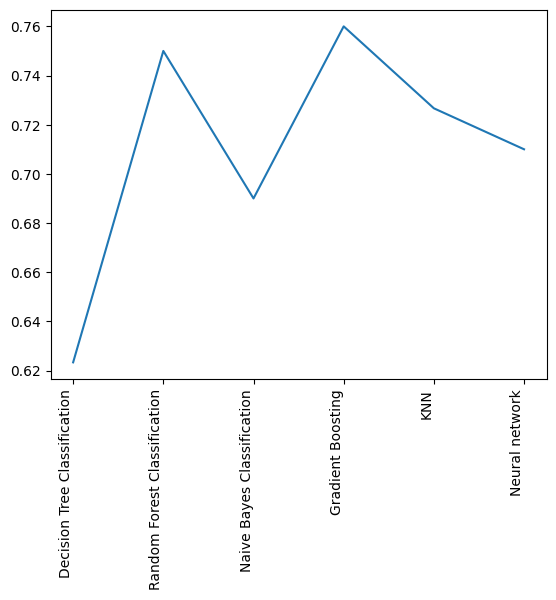

In [ ]:
# plotting line graph that shows accuracy of all model used
plt.plot(alg_names,alg_values)
plt.xticks(rotation=90,ha='right')

this shows the accuracy graph of different algorithms from which we can conclude that gradient boosting has best and hightest accuracy